# HR Analytics - Attrition Prediction Model

## Introduction
Attrition is a major concern for organizations as high employee turnover can lead to increased recruitment and training costs, as well as reduced employee morale. In this project, we explore the use of machine learning models to predict employee attrition based on various features such as job satisfaction, work-life balance, and monthly income. By identifying the key drivers of attrition, organizations can develop better retention strategies and take proactive steps to retain their top talent.

The dataset used for this project includes various employee attributes and performance indicators, which were fetched from a PostgreSQL database. Through exploratory data analysis (EDA), we uncovered several important patterns and correlations that help us understand the underlying reasons for attrition. Based on these insights, we built multiple machine learning models to predict whether an employee will leave the company (attrition) or not.

## Objective
The primary objective of this analysis is to build machine learning models that predict employee attrition. Specifically, the goals are as follows:

1. **Database Connection**: Establish a connection to a PostgreSQL database to fetch employee data for analysis using SQLAlchemy and psycopg2.
2. **EDA and Insights**: Perform exploratory data analysis to uncover insights into the factors influencing employee attrition.
3. **Model Building**: Train machine learning models (Logistic Regression, Logistic Regression with SMOTE, and Random Forest) to predict employee attrition.
4. **Model Evaluation**: Evaluate the models based on key performance metrics such as accuracy, precision, recall, F1-score, and AUC (Area Under the Curve).
5. **Addressing Class Imbalance**: Use the SMOTE (Synthetic Minority Over-sampling Technique) method to handle the class imbalance in the dataset and improve model performance for predicting "Attrition".
6. **Model Saving & Visualization**: Save the trained models and visualizations for future use and decision-making.

The database connection was made using SQLAlchemy and psycopg2, allowing easy interaction with the PostgreSQL database, and enabling the efficient retrieval and querying of the dataset for further analysis and model training.

## Future Work
While the models built in this project provide valuable insights, there are several opportunities for improvement and further exploration:

1. **Advanced Models**: Explore more advanced machine learning models such as Support Vector Machines (SVM), XGBoost, and Neural Networks to improve predictive accuracy.
2. **Feature Engineering**: Investigate additional features that may impact attrition, such as employee feedback, career growth opportunities, and more granular job role information.
3. **Model Tuning**: Perform hyperparameter tuning using techniques like GridSearchCV or RandomizedSearchCV to optimize the performance of the models.
4. **Handling Missing Data**: Address missing values more effectively, using imputation techniques or by engineering new features to mitigate the impact of missing data.
5. **Real-Time Prediction**: Deploy the final model to make real-time predictions for organizations, enabling them to take timely actions to prevent attrition.
6. **Explainability**: Implement model interpretability techniques (e.g., SHAP values) to better understand why the model makes certain predictions, which can help decision-makers take targeted actions.
7. **Evaluation with Other Datasets**: Validate the models with other datasets from different organizations to check the robustness and generalizability of the predictions.

By continuing to improve and refine these models, organizations can better predict employee attrition and implement more effective retention strategies, ultimately reducing turnover rates and associated costs.

### Load Data

In [1]:
pip install psycopg2 sqlalchemy

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 1.2/1.2 MB 8.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [19]:
from sqlalchemy import create_engine
import psycopg2
import pandas as pd

# Parametres
username = "postgres"         
password = "password"         
host = "localhost"            
port = "5432"                 
database = "HR_Analystics"    

# СString connection for SQLAlchemy
connection_string = f"postgresql://{username}:{password}@{host}:{port}/{database}"

# Check connection for SQLAlchemy
print("Testing connection with SQLAlchemy...")
try:
    engine = create_engine(connection_string)
    # Try simple querry.
    test_query = "SELECT 1;"
    with engine.connect() as conn:
        result = conn.execute(test_query)
        print("SQLAlchemy connection successful:", result.fetchall())
except Exception as e:
    print("SQLAlchemy connection failed:", e)

# Check connections with psycopg2
print("\nTesting connection with psycopg2...")
try:
    conn = psycopg2.connect(
        dbname=database,
        user=username,
        password=password,
        host=host,
        port=port
    )
    print("psycopg2 connection successful!")
    conn.close()
except Exception as e:
    print("psycopg2 connection failed:", e)

# Querry if connections successful
query = """
SELECT 
    e.EmpID,
    e.Age,
    e.AgeGroup,
    e.Attrition,
    e.DailyRate,
    e.DistanceFromHome,
    e.Education,
    ef.EducationFieldName AS EducationField,
    e.EmployeeNumber,
    e.EnvironmentSatisfaction,
    e.Gender,
    e.HourlyRate,
    e.JobInvolvement,
    e.JobLevel,
    jr.JobRoleName AS JobRole,
    e.JobSatisfaction,
    ms.MaritalStatusName AS MaritalStatus,
    e.MonthlyIncome,
    e.SalarySlab,
    e.MonthlyRate,
    e.NumCompaniesWorked,
    e.OverTime,
    e.PercentSalaryHike,
    e.PerformanceRating,
    e.RelationshipSatisfaction,
    e.StockOptionLevel,
    e.TotalWorkingYears,
    e.TrainingTimesLastYear,
    e.WorkLifeBalance,
    e.YearsAtCompany,
    e.YearsInCurrentRole,
    e.YearsSinceLastPromotion,
    e.YearsWithCurrManager,
    d.DepartmentName AS Department,
    bt.BusinessTravelName AS BusinessTravel
FROM Employees e
LEFT JOIN Departments d ON e.DepartmentID = d.DepartmentID
LEFT JOIN EducationFields ef ON e.EducationFieldID = ef.EducationFieldID
LEFT JOIN JobRoles jr ON e.JobRoleID = jr.JobRoleID
LEFT JOIN MaritalStatuses ms ON e.MaritalStatusID = ms.MaritalStatusID
LEFT JOIN BusinessTravels bt ON e.BusinessTravelID = bt.BusinessTravelID;
"""

print("\nExecuting query through SQLAlchemy...")
try:
    # Reada data with DataFrame
    df = pd.read_sql_query(query, engine)
    print("Query executed successfully! Here's the data:")
    print(df.head())
except Exception as e:
    print("Query execution failed:", e)


Testing connection with SQLAlchemy...
SQLAlchemy connection failed: Not an executable object: 'SELECT 1;'

Testing connection with psycopg2...
psycopg2 connection successful!

Executing query through SQLAlchemy...
Query executed successfully! Here's the data:
   empid  age agegroup  attrition  dailyrate  distancefromhome  education  \
0  RM297   18    18-25       True        230                 3          3   
1  RM302   18    18-25      False        812                10          3   
2  RM458   18    18-25       True       1306                 5          3   
3  RM728   18    18-25      False        287                 5          2   
4  RM829   18    18-25       True        247                 8          1   

  educationfield  employeenumber  environmentsatisfaction  ...  \
0  Life Sciences             405                        3  ...   
1        Medical             411                        4  ...   
2      Marketing             614                        2  ...   
3  Life Scien

In [21]:
df.describe()

,age,dailyrate,distancefromhome,education,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,...,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.076871
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.498547
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   empid                     1470 non-null   object 
 1   age                       1470 non-null   int64  
 2   agegroup                  1470 non-null   object 
 3   attrition                 1470 non-null   bool   
 4   dailyrate                 1470 non-null   int64  
 5   distancefromhome          1470 non-null   int64  
 6   education                 1470 non-null   int64  
 7   educationfield            1470 non-null   object 
 8   employeenumber            1470 non-null   int64  
 9   environmentsatisfaction   1470 non-null   int64  
 10  gender                    1470 non-null   object 
 11  hourlyrate                1470 non-null   int64  
 12  jobinvolvement            1470 non-null   int64  
 13  joblevel                  1470 non-null   int64  
 14  jobrole 

### 2: Exploratory Data Analysis (EDA)

#### Attrition Count Visualization

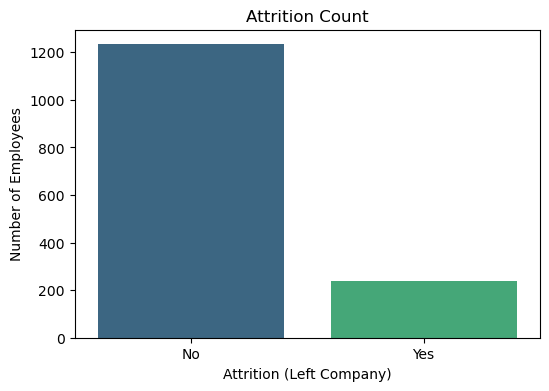

In [24]:
# Attrition count with updated syntax
plt.figure(figsize=(6, 4))
sns.countplot(x='attrition', hue='attrition', data=df, palette='viridis', dodge=False, legend=False)
plt.title('Attrition Count')
plt.xlabel('Attrition (Left Company)')
plt.ylabel('Number of Employees')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


#### Job Satisfaction and Work-Life Balance Distributions

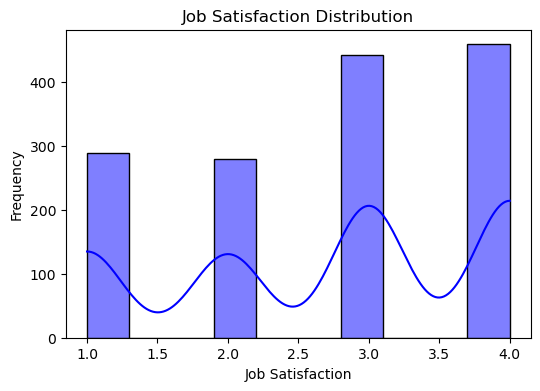

In [25]:
# Job Satisfaction Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['jobsatisfaction'], kde=True, bins=10, color='blue')
plt.title('Job Satisfaction Distribution')
plt.xlabel('Job Satisfaction')
plt.ylabel('Frequency')
plt.show()

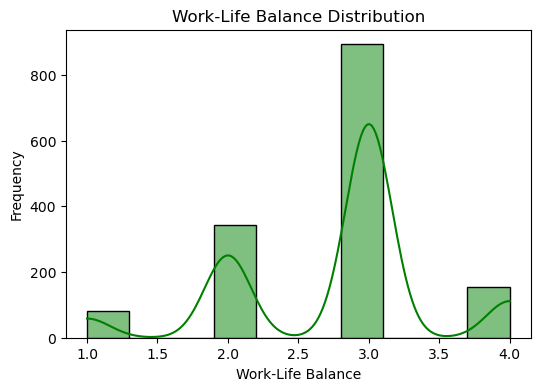

In [26]:
# Work-Life Balance Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['worklifebalance'], kde=True, bins=10, color='green')
plt.title('Work-Life Balance Distribution')
plt.xlabel('Work-Life Balance')
plt.ylabel('Frequency')
plt.show()

#### Attrition by Job Role

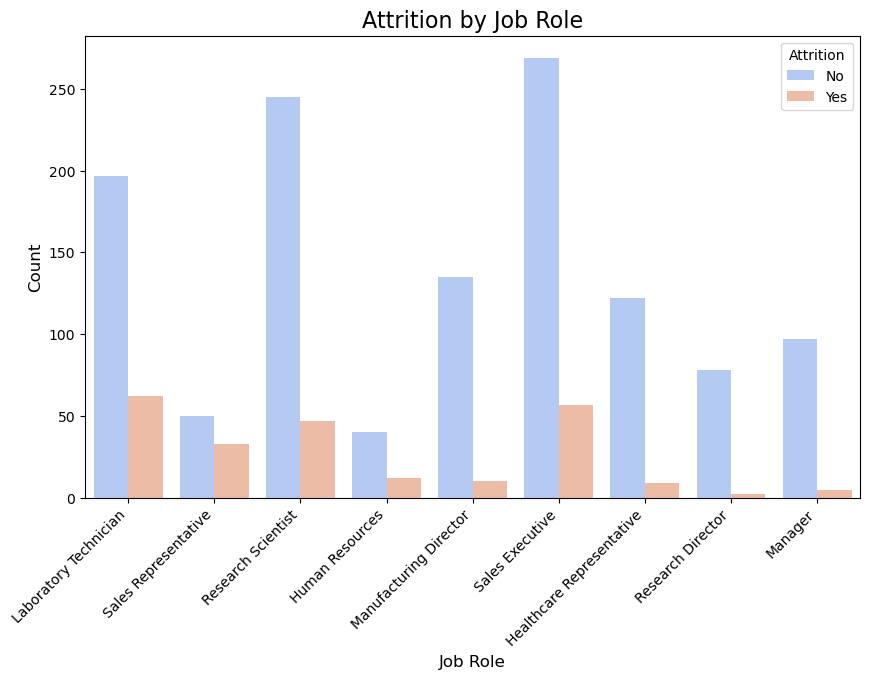

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='jobrole', hue='attrition', palette='coolwarm')
plt.title('Attrition by Job Role', fontsize=16)
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

#### Monthly Income Distribution by Attrition

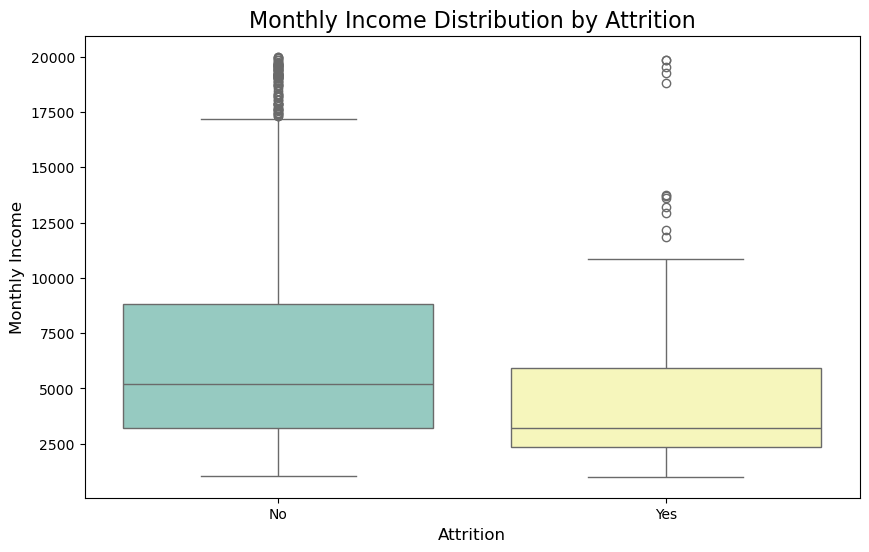

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='attrition', y='monthlyincome', hue='attrition', palette='Set3', dodge=False, legend=False)
plt.title('Monthly Income Distribution by Attrition', fontsize=16)
plt.xlabel('Attrition', fontsize=12)
plt.ylabel('Monthly Income', fontsize=12)
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

#### Work-Life Balance vs. Job Satisfaction Heatmap

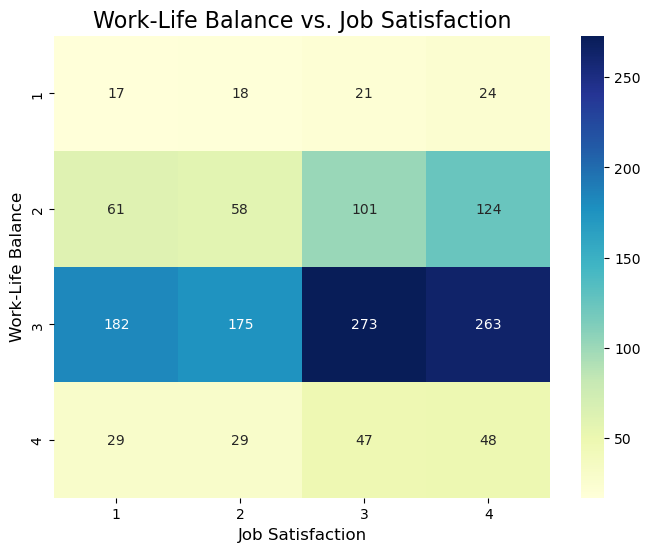

In [30]:
# Create a pivot table
heatmap_data = df.pivot_table(index='worklifebalance', columns='jobsatisfaction', aggfunc='size', fill_value=0)

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Work-Life Balance vs. Job Satisfaction', fontsize=16)
plt.xlabel('Job Satisfaction', fontsize=12)
plt.ylabel('Work-Life Balance', fontsize=12)
plt.show()

#### Attrition by Age Group and Gender

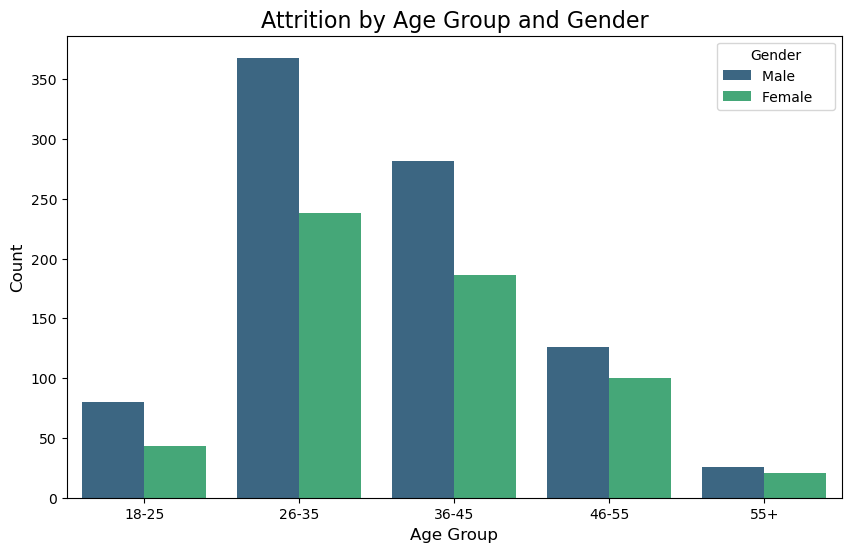

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='agegroup', hue='gender', palette='viridis')
plt.title('Attrition by Age Group and Gender', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Gender')
plt.show()

#### Age Distribution

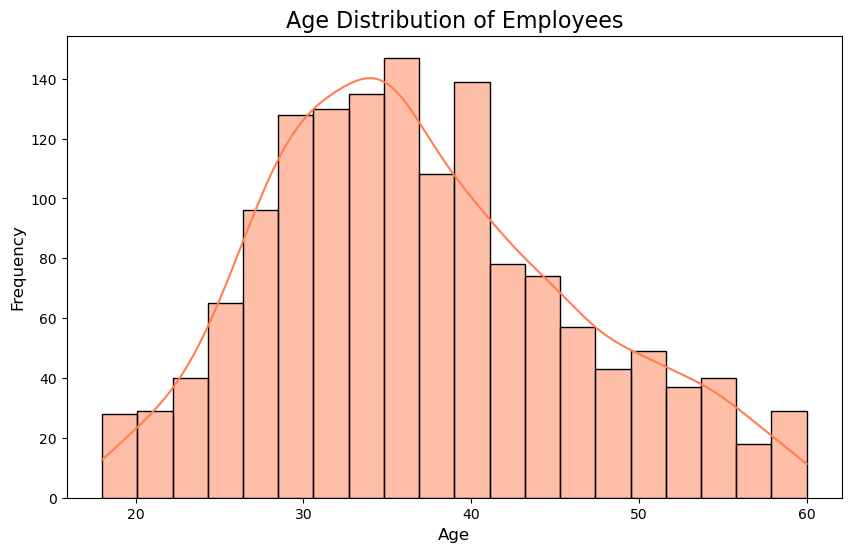

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=20, color='coral')
plt.title('Age Distribution of Employees', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

#### Distribution of Total Working Years

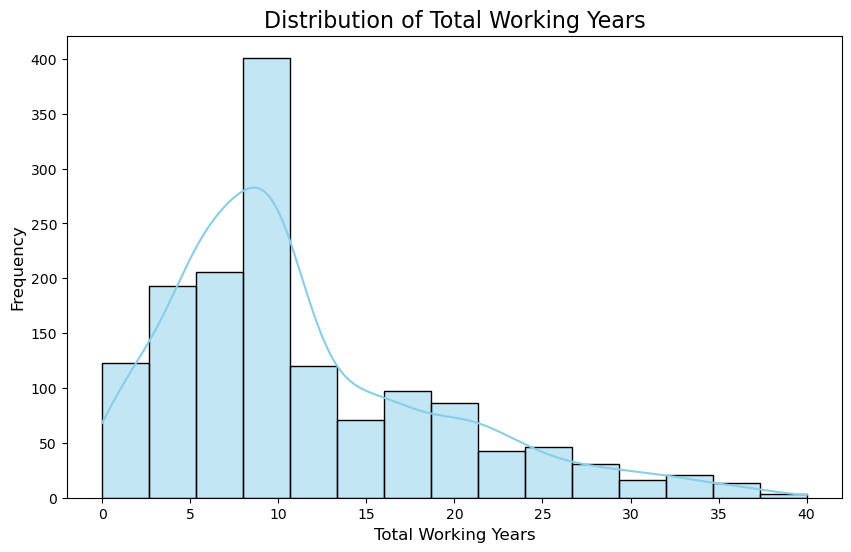

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df['totalworkingyears'], kde=True, bins=15, color='skyblue')
plt.title('Distribution of Total Working Years', fontsize=16)
plt.xlabel('Total Working Years', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

#### Performance Rating by Years at Company

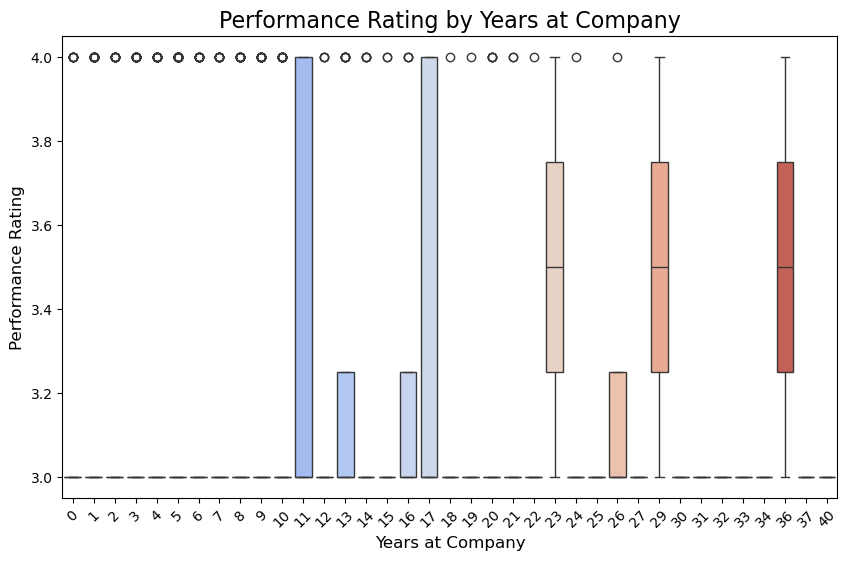

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='yearsatcompany', y='performancerating', hue='yearsatcompany', palette='coolwarm', dodge=False)
plt.title('Performance Rating by Years at Company', fontsize=16)
plt.xlabel('Years at Company', fontsize=12)
plt.ylabel('Performance Rating', fontsize=12)
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)  # Remove unnecessary legend
plt.show()

#### Monthly Income Distribution

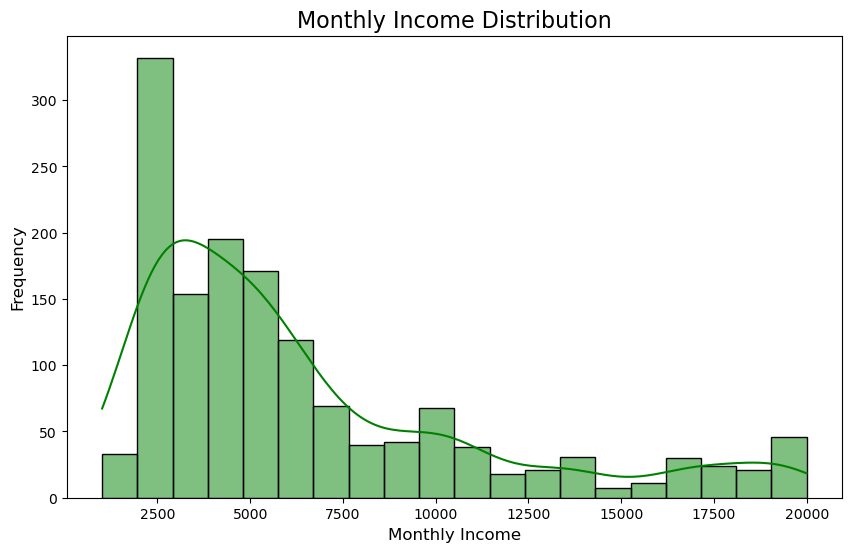

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(df['monthlyincome'], kde=True, bins=20, color='green')
plt.title('Monthly Income Distribution', fontsize=16)
plt.xlabel('Monthly Income', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

#### Work-Life Balance by Attrition Status

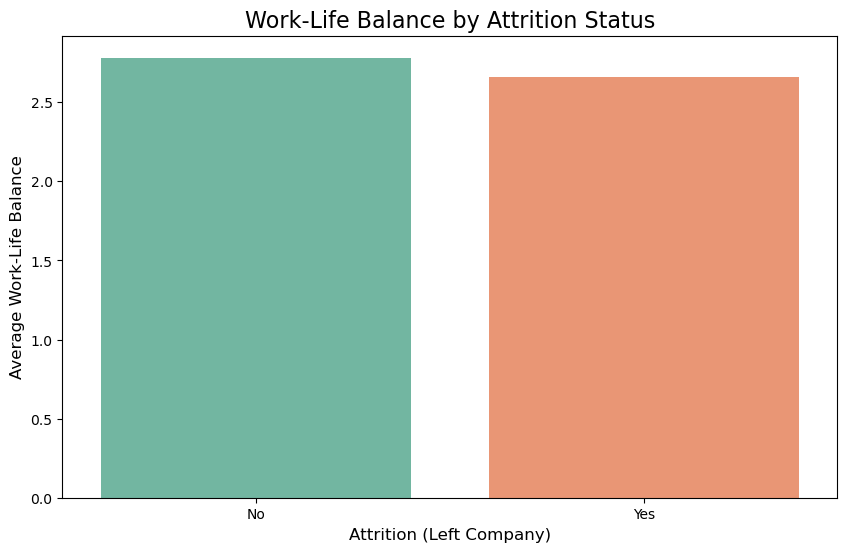

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='attrition', y='worklifebalance', hue='attrition', errorbar=None, palette='Set2', dodge=False, legend=False)
plt.title('Work-Life Balance by Attrition Status', fontsize=16)
plt.xlabel('Attrition (Left Company)', fontsize=12)
plt.ylabel('Average Work-Life Balance', fontsize=12)
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

#### Job Satisfaction by Training Times Last Year

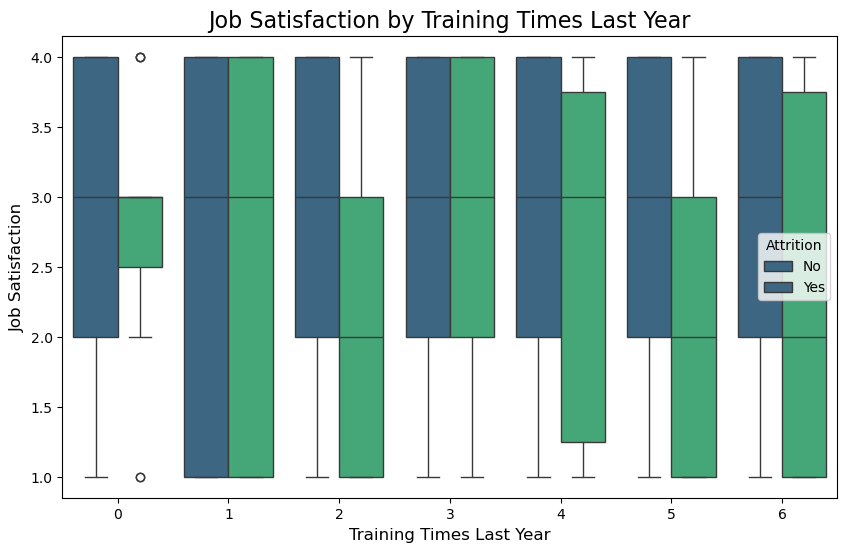

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='trainingtimeslastyear', y='jobsatisfaction', hue='attrition', palette='viridis')
plt.title('Job Satisfaction by Training Times Last Year', fontsize=16)
plt.xlabel('Training Times Last Year', fontsize=12)
plt.ylabel('Job Satisfaction', fontsize=12)
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

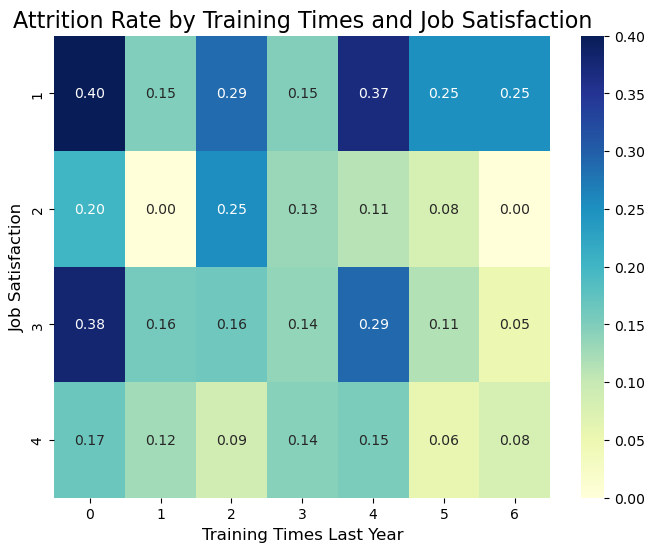

In [43]:
# Create a pivot table for counts
heatmap_data = df.pivot_table(index='jobsatisfaction', columns='trainingtimeslastyear', values='attrition', aggfunc='mean')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True)
plt.title('Attrition Rate by Training Times and Job Satisfaction', fontsize=16)
plt.xlabel('Training Times Last Year', fontsize=12)
plt.ylabel('Job Satisfaction', fontsize=12)
plt.show()

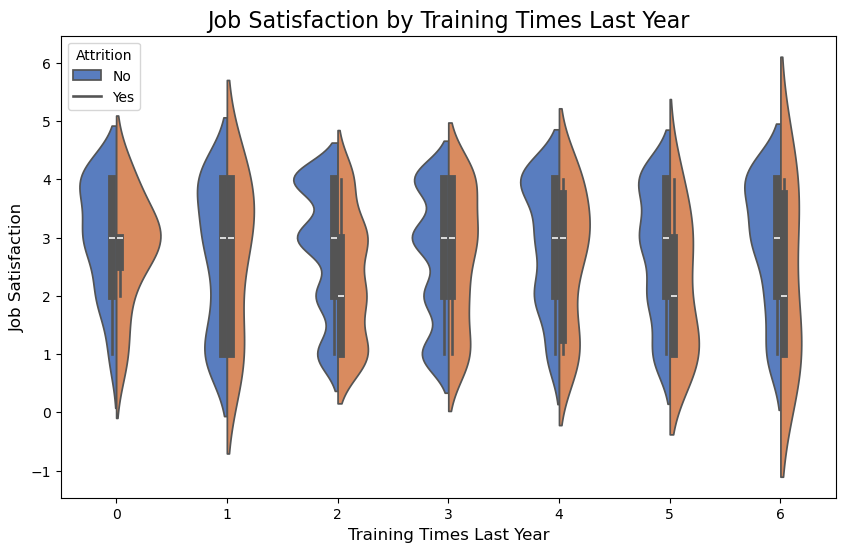

In [44]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='trainingtimeslastyear', y='jobsatisfaction', hue='attrition', split=True, palette='muted')
plt.title('Job Satisfaction by Training Times Last Year', fontsize=16)
plt.xlabel('Training Times Last Year', fontsize=12)
plt.ylabel('Job Satisfaction', fontsize=12)
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

## Job Satisfaction by Years Since Last Promotion (Grouped by Job Role)

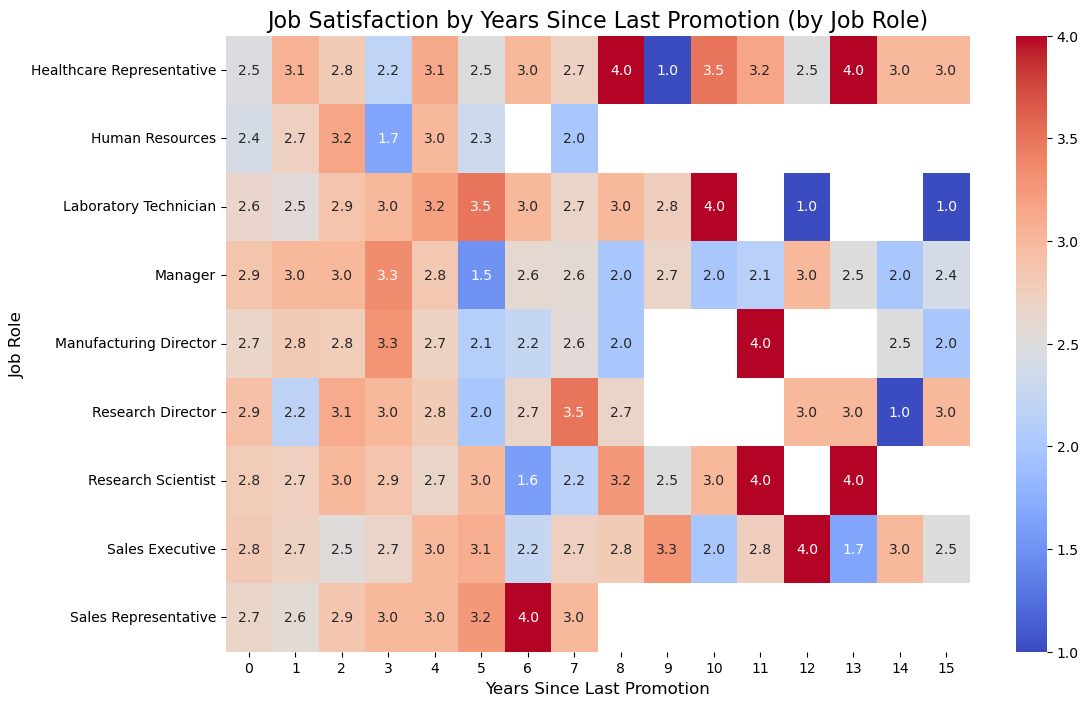

In [47]:
# Prepare data for heatmap
heatmap_data = df.pivot_table(index='jobrole', columns='yearssincelastpromotion', values='jobsatisfaction', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="coolwarm", cbar=True)
plt.title('Job Satisfaction by Years Since Last Promotion (by Job Role)', fontsize=16)
plt.xlabel('Years Since Last Promotion', fontsize=12)
plt.ylabel('Job Role', fontsize=12)
plt.show()

## 3. Correlation Between Key Metrics

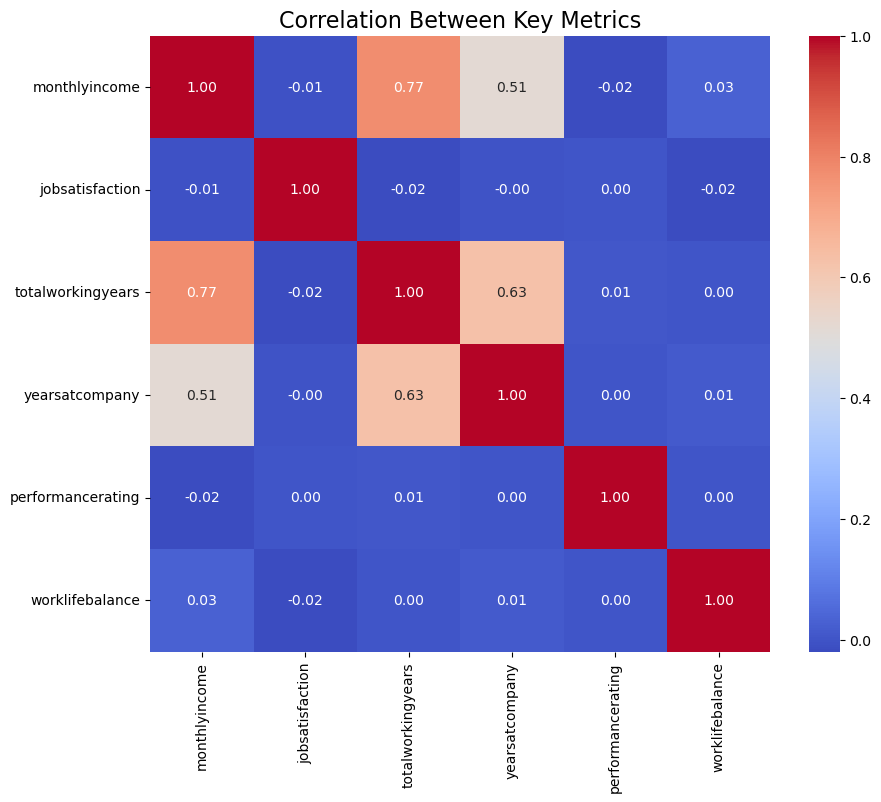

In [48]:
# Selecting key numeric metrics
correlation_data = df[['monthlyincome', 'jobsatisfaction', 'totalworkingyears', 'yearsatcompany', 'performancerating', 'worklifebalance']]

# Correlation matrix
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Between Key Metrics', fontsize=16)
plt.show()

# Exploratory Data Analysis (EDA) Summary

## 1. **Attrition Count**
The majority of employees in the dataset have not left the company, with significantly fewer employees who have left (Attrition: Yes).

- **Attrition**: 
  - No: 1233 employees
  - Yes: 237 employees

## 2. **Job Satisfaction Distribution**
- Job satisfaction is generally distributed across various satisfaction levels (1 to 4), with most employees reporting a job satisfaction score of 3.
- The distribution shows higher frequencies for mid-range satisfaction (2.5 to 3.5), with a slight skew towards job satisfaction being at the lower end (1 to 2).

## 3. **Work-Life Balance Distribution**
- Work-Life Balance also shows a slightly uneven distribution, with most employees reporting a score of 2 to 3, indicating a better work-life balance. 
- There are some employees reporting extremely low (1) or high (4) scores, suggesting certain outliers in terms of balance between work and personal life.

## 4. **Attrition by Job Role**
- The majority of employees who left the company are in job roles like "Sales Representative" and "Laboratory Technician".
- Roles such as "Research Director" and "Manager" show fewer instances of attrition.

## 5. **Monthly Income Distribution by Attrition**
- Monthly income distribution clearly differentiates between employees who left and those who stayed.
- Employees who stayed (Attrition = No) tend to have higher monthly incomes, with a higher median salary and fewer outliers.
- On the other hand, employees who left (Attrition = Yes) have a lower median salary, and many employees have incomes below $5,000.

## 6. **Work-Life Balance vs. Job Satisfaction**
- The heatmap reveals that employees with a higher work-life balance tend to also report higher job satisfaction.
- The highest concentration of employees is found in the “middle” range of work-life balance and job satisfaction.

## 7. **Attrition by Age Group and Gender**
- Attrition is highest in the age group of 26-35 years, with male employees showing slightly higher attrition rates than female employees across the board.
- The “18-25” age group shows the lowest attrition rate.

## 8. **Age Distribution of Employees**
- The distribution of employee age is roughly normal, with the peak in the mid-30s to 40s. 
- There are also fewer employees in the age groups above 50, and an upward trend starts to show from the late 20s.

## 9. **Distribution of Total Working Years**
- Employees with fewer working years (0-5) dominate the dataset, with a significant spike in the "10 years" range, showing employees who have been in the company for a longer duration.
  
## 10. **Performance Rating by Years at Company**
- Employees who have been at the company for 10-15 years have the highest performance ratings, while newer employees have a more spread out distribution of performance ratings, including some low performers.

## 11. **Monthly Income Distribution**
- Monthly income is right-skewed with a significant number of employees earning between $3,000 and $6,000, and the distribution becomes sparser as the income increases.

## 12. **Work-Life Balance by Attrition Status**
- Work-life balance scores are fairly similar for employees who have stayed and those who have left. However, the attrition group appears to have a slightly lower average work-life balance score compared to those who stayed.

## 13. **Job Satisfaction by Training Times Last Year**
- Job satisfaction tends to be higher for employees who had fewer training times last year.
- Higher job satisfaction scores were observed among employees with lower training times.

## 14. **Attrition Rate by Training Times and Job Satisfaction**
- The heatmap suggests that job satisfaction and the number of training times last year correlate with attrition, with employees having fewer training times and lower job satisfaction showing a higher attrition rate.

## 15. **Job Satisfaction by Years Since Last Promotion (Grouped by Job Role)**
- There are differences in job satisfaction by job role and the years since the last promotion, with some job roles showing lower satisfaction for those who have waited many years for a promotion.
- For example, "Sales Representative" roles had lower satisfaction after several years of no promotion.

## 16. **Correlation Between Key Metrics**
- There are notable positive correlations between "Monthly Income" and "Total Working Years" (0.77) and between "Total Working Years" and "Years at Company" (0.63).
- "Job Satisfaction" has a weak correlation with "Performance Rating" and "Work-life Balance", while "Monthly Income" shows no significant correlation with job satisfaction.

---

### Key Takeaways:
1. **Attrition Rate**: The data is highly imbalanced, with the majority of employees not leaving the company.
2. **Work-Life Balance & Job Satisfaction**: Employees with a better work-life balance tend to report higher job satisfaction.
3. **Job Roles**: Certain job roles have significantly higher attrition rates, including sales and technical roles.
4. **Income & Performance**: Employees with higher income tend to stay longer, and performance ratings correlate with job satisfaction.
5. **Training & Attrition**: More training doesn't necessarily correlate with higher job satisfaction, and it seems to influence attrition rates in more complicated ways.

These insights can help guide retention strategies, identify key factors that contribute to employee satisfaction, and assist in making data-driven decisions to improve employee engagement and reduce attrition.


#### Code to Save All Figures into a PDF

In [53]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df is already loaded with your data
# Create PDF for saving the dashboard
with PdfPages("EDA_Visualizations_Final.pdf") as pdf:

    # 1. Attrition Count Visualization
    plt.figure(figsize=(6, 4))
    sns.countplot(x='attrition', hue='attrition', data=df, palette='viridis', dodge=False, legend=False)
    plt.title('Attrition Count')
    plt.xlabel('Attrition (Left Company)')
    plt.ylabel('Number of Employees')
    plt.xticks([0, 1], ['No', 'Yes'])
    pdf.savefig()  # Save the figure to the PDF
    plt.close()

    # 2. Job Satisfaction Distribution
    plt.figure(figsize=(6, 4))
    sns.histplot(df['jobsatisfaction'], kde=True, bins=10, color='blue')
    plt.title('Job Satisfaction Distribution')
    plt.xlabel('Job Satisfaction')
    plt.ylabel('Frequency')
    pdf.savefig()
    plt.close()

    # 3. Work-Life Balance Distribution
    plt.figure(figsize=(6, 4))
    sns.histplot(df['worklifebalance'], kde=True, bins=10, color='green')
    plt.title('Work-Life Balance Distribution')
    plt.xlabel('Work-Life Balance')
    plt.ylabel('Frequency')
    pdf.savefig()
    plt.close()

    # 4. Attrition by Job Role
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='jobrole', hue='attrition', palette='coolwarm')
    plt.title('Attrition by Job Role', fontsize=16)
    plt.xlabel('Job Role', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Attrition', labels=['No', 'Yes'])
    pdf.savefig()
    plt.close()

    # 5. Monthly Income Distribution by Attrition
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='attrition', y='monthlyincome', hue='attrition', palette='Set3', dodge=False, legend=False)
    plt.title('Monthly Income Distribution by Attrition', fontsize=16)
    plt.xlabel('Attrition', fontsize=12)
    plt.ylabel('Monthly Income', fontsize=12)
    plt.xticks([0, 1], ['No', 'Yes'])
    pdf.savefig()
    plt.close()

    # 6. Work-Life Balance vs. Job Satisfaction Heatmap
    heatmap_data = df.pivot_table(index='worklifebalance', columns='jobsatisfaction', aggfunc='size', fill_value=0)
    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
    plt.title('Work-Life Balance vs. Job Satisfaction', fontsize=16)
    plt.xlabel('Job Satisfaction', fontsize=12)
    plt.ylabel('Work-Life Balance', fontsize=12)
    pdf.savefig()
    plt.close()

    # 7. Attrition by Age Group and Gender
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='agegroup', hue='gender', palette='viridis')
    plt.title('Attrition by Age Group and Gender', fontsize=16)
    plt.xlabel('Age Group', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Gender')
    pdf.savefig()
    plt.close()

    # 8. Age Distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df['age'], kde=True, bins=20, color='coral')
    plt.title('Age Distribution of Employees', fontsize=16)
    plt.xlabel('Age', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    pdf.savefig()
    plt.close()

    # 9. Distribution of Total Working Years
    plt.figure(figsize=(10, 6))
    sns.histplot(df['totalworkingyears'], kde=True, bins=15, color='skyblue')
    plt.title('Distribution of Total Working Years', fontsize=16)
    plt.xlabel('Total Working Years', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    pdf.savefig()
    plt.close()

    # 10. Performance Rating by Years at Company
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='yearsatcompany', y='performancerating', hue='yearsatcompany', palette='coolwarm', dodge=False)
    plt.title('Performance Rating by Years at Company', fontsize=16)
    plt.xlabel('Years at Company', fontsize=12)
    plt.ylabel('Performance Rating', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend([],[], frameon=False)
    pdf.savefig()
    plt.close()

    # 11. Monthly Income Distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df['monthlyincome'], kde=True, bins=20, color='green')
    plt.title('Monthly Income Distribution', fontsize=16)
    plt.xlabel('Monthly Income', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    pdf.savefig()
    plt.close()

    # 12. Work-Life Balance by Attrition Status
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x='attrition', y='worklifebalance', hue='attrition', errorbar=None, palette='Set2', dodge=False, legend=False)
    plt.title('Work-Life Balance by Attrition Status', fontsize=16)
    plt.xlabel('Attrition (Left Company)', fontsize=12)
    plt.ylabel('Average Work-Life Balance', fontsize=12)
    plt.xticks([0, 1], ['No', 'Yes'])
    pdf.savefig()
    plt.close()

    # 13. Job Satisfaction by Training Times Last Year
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='trainingtimeslastyear', y='jobsatisfaction', hue='attrition', palette='viridis')
    plt.title('Job Satisfaction by Training Times Last Year', fontsize=16)
    plt.xlabel('Training Times Last Year', fontsize=12)
    plt.ylabel('Job Satisfaction', fontsize=12)
    plt.legend(title='Attrition', labels=['No', 'Yes'])
    pdf.savefig()
    plt.close()

    # 14. Attrition Rate by Training Times and Job Satisfaction Heatmap
    heatmap_data = df.pivot_table(index='jobsatisfaction', columns='trainingtimeslastyear', values='attrition', aggfunc='mean')
    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True)
    plt.title('Attrition Rate by Training Times and Job Satisfaction', fontsize=16)
    plt.xlabel('Training Times Last Year', fontsize=12)
    plt.ylabel('Job Satisfaction', fontsize=12)
    pdf.savefig()
    plt.close()

    # 15. Job Satisfaction by Training Times Last Year (Violin Plot)
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=df, x='trainingtimeslastyear', y='jobsatisfaction', hue='attrition', split=True, palette='muted')
    plt.title('Job Satisfaction by Training Times Last Year', fontsize=16)
    plt.xlabel('Training Times Last Year', fontsize=12)
    plt.ylabel('Job Satisfaction', fontsize=12)
    plt.legend(title='Attrition', labels=['No', 'Yes'])
    pdf.savefig()
    plt.close()

    # 16. Job Satisfaction by Years Since Last Promotion (Grouped by Job Role)
    heatmap_data = df.pivot_table(index='jobrole', columns='yearssincelastpromotion', values='jobsatisfaction', aggfunc='mean')
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="coolwarm", cbar=True)
    plt.title('Job Satisfaction by Years Since Last Promotion (by Job Role)', fontsize=16)
    plt.xlabel('Years Since Last Promotion', fontsize=12)
    plt.ylabel('Job Role', fontsize=12)
    pdf.savefig()
    plt.close()

    # 17. Correlation Between Key Metrics
    correlation_data = df[['monthlyincome', 'jobsatisfaction', 'totalworkingyears', 'yearsatcompany', 'performancerating', 'worklifebalance']]
    correlation_matrix = correlation_data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
    plt.title('Correlation Between Key Metrics', fontsize=16)
    pdf.savefig()
    plt.close()

print("PDF created successfully: EDA_Visualizations_Final.pdf")

PDF created successfully: EDA_Visualizations_Final.pdf


## 1.Data Preprocessing and Model Building

### Logistic Regression model

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

In [59]:
print(df.columns)

Index(['empid', 'age', 'agegroup', 'attrition', 'dailyrate',
       'distancefromhome', 'education', 'educationfield', 'employeenumber',
       'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement',
       'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus',
       'monthlyincome', 'salaryslab', 'monthlyrate', 'numcompaniesworked',
       'overtime', 'percentsalaryhike', 'performancerating',
       'relationshipsatisfaction', 'stockoptionlevel', 'totalworkingyears',
       'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany',
       'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager',
       'department', 'businesstravel'],
      dtype='object')


In [70]:
# Check unique values in the 'attrition' column to understand the responses
print(df['attrition'].unique())

[ True False]


In [71]:
from sklearn.model_selection import train_test_split

# Select features and target variable for prediction
X = df[['age', 'monthlyincome', 'jobsatisfaction', 'totalworkingyears', 'yearsatcompany']]  # Features
y = df['attrition']  # Target (True for attrition, False for no attrition)

# Apply stratified sampling to ensure both classes are present in the training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check the class distribution in the training and test sets
print("Training set distribution:\n", y_train.value_counts())
print("Test set distribution:\n", y_test.value_counts())

Training set distribution:
 attrition
False    863
True     166
Name: count, dtype: int64
Test set distribution:
 attrition
False    370
True      71
Name: count, dtype: int64


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train the Logistic Regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))


Accuracy: 0.8390022675736961
              precision    recall  f1-score   support

       False       0.84      1.00      0.91       370
        True       0.00      0.00      0.00        71

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.70      0.84      0.77       441



C:\Users\Zana\miniconda3\envs\pymc_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Zana\miniconda3\envs\pymc_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Zana\miniconda3\envs\pymc_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [73]:
# Train the Logistic Regression model with balanced class weight
model = LogisticRegression(class_weight='balanced', max_iter=500)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.6213151927437641
              precision    recall  f1-score   support

       False       0.94      0.59      0.72       370
        True       0.27      0.79      0.40        71

    accuracy                           0.62       441
   macro avg       0.60      0.69      0.56       441
weighted avg       0.83      0.62      0.67       441



In [75]:
import joblib
joblib.dump(model, 'logistic_regression_model.joblib')
print("Model saved successfully!")

Model saved successfully!


In [76]:
# Load the model
model = joblib.load('logistic_regression_model.joblib')
predictions = model.predict(X_test)

#### Visualization for Logistic Regression model

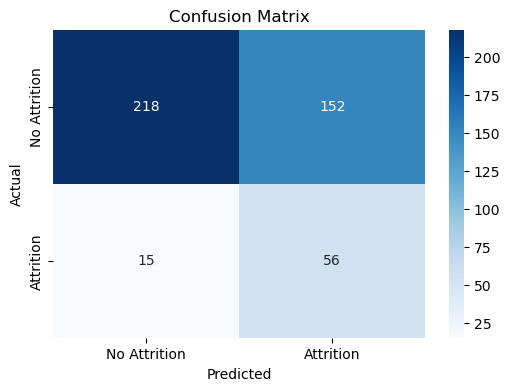

In [77]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

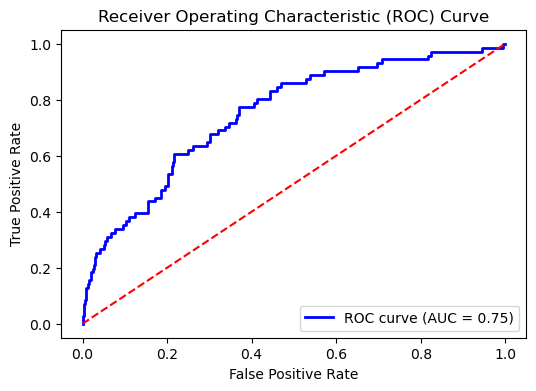

In [78]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

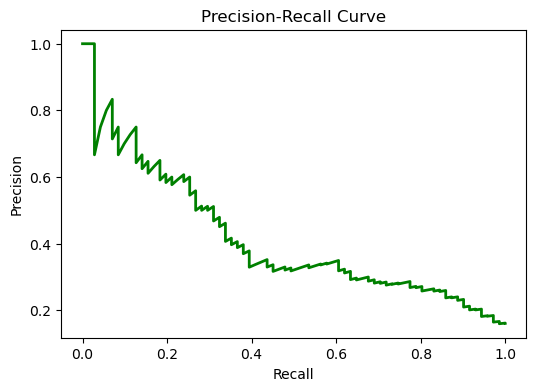

In [79]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='green', lw=2)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

C:\Users\Zana\AppData\Local\Temp\ipykernel_9468\54163510.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features, y=coefficients, palette='viridis', hue=None)


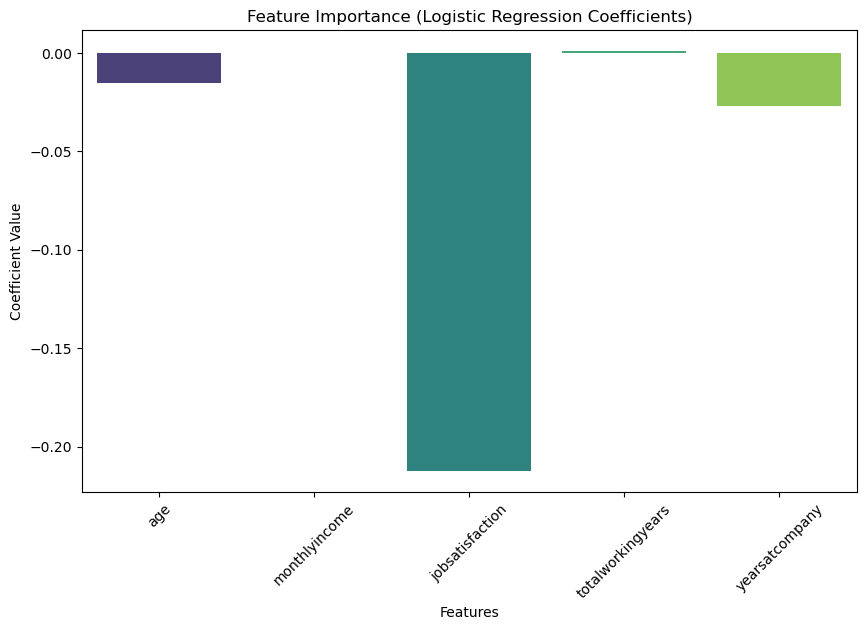

In [82]:
# Create a bar plot of the coefficients with explicit hue
plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=coefficients, palette='viridis', hue=None)
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.show()

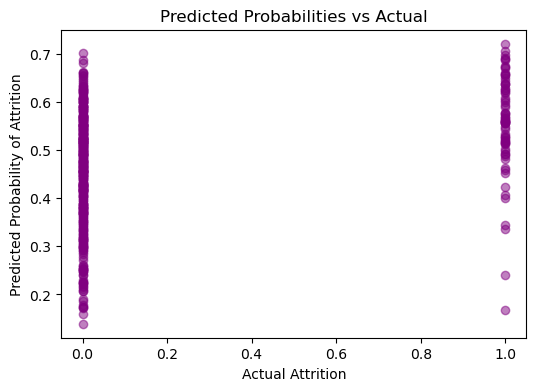

In [81]:
# Plot predicted probabilities vs actual target
plt.figure(figsize=(6, 4))
plt.scatter(y_test, model.predict_proba(X_test)[:, 1], color='purple', alpha=0.5)
plt.title('Predicted Probabilities vs Actual')
plt.xlabel('Actual Attrition')
plt.ylabel('Predicted Probability of Attrition')
plt.show()

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve, roc_curve, auc, confusion_matrix
from matplotlib.backends.backend_pdf import PdfPages

# Assuming the model, X_test, y_test, predictions, and necessary data are already available

# Define the features and coefficients based on the logistic regression model
features = X.columns  # Feature names
coefficients = model.coef_[0]  # Model coefficients

# Create the PDF to save the visualizations
with PdfPages('logistic_regression_visualizations.pdf') as pdf:  # Use a relative path here

    # Plot Feature Importance (Logistic Regression Coefficients)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=features, y=coefficients, palette='viridis', hue=None)
    plt.title('Feature Importance (Logistic Regression Coefficients)')
    plt.xlabel('Features')
    plt.ylabel('Coefficient Value')
    plt.xticks(rotation=45)
    pdf.savefig()  # Save the figure to the PDF
    plt.close()  # Close the plot

    # Plot Predicted Probabilities vs Actual
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, model.predict_proba(X_test)[:, 1], color='purple', alpha=0.5)
    plt.title('Predicted Probabilities vs Actual')
    plt.xlabel('Actual Attrition')
    plt.ylabel('Predicted Probability of Attrition')
    pdf.savefig()  # Save the figure to the PDF
    plt.close()  # Close the plot

    # Plot Precision-Recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision, color='green', lw=2)
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    pdf.savefig()  # Save the figure to the PDF
    plt.close()  # Close the plot

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    pdf.savefig()  # Save the figure to the PDF
    plt.close()  # Close the plot

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    pdf.savefig()  # Save the figure to the PDF
    plt.close()  # Close the plot

# The PDF will be saved at the current working directory


C:\Users\Zana\AppData\Local\Temp\ipykernel_9468\2246650496.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features, y=coefficients, palette='viridis', hue=None)


## SMOTE (Synthetic Minority Over-sampling Technique)

In [85]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train logistic regression on the resampled dataset
model = LogisticRegression(max_iter=500)
model.fit(X_resampled, y_resampled)

predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.6462585034013606
              precision    recall  f1-score   support

       False       0.91      0.65      0.75       370
        True       0.26      0.65      0.37        71

    accuracy                           0.65       441
   macro avg       0.58      0.65      0.56       441
weighted avg       0.80      0.65      0.69       441



In [87]:
import joblib
joblib.dump(model, 'logistic_regression_smote_model.pkl')
print("Model saved successfully!")

Model saved successfully!


In [88]:
# Load the saved model from the file
loaded_model = joblib.load('logistic_regression_smote_model.pkl')
predictions = loaded_model.predict(X_test)
print("Predictions from the loaded model:", predictions)

Predictions from the loaded model: [ True False False  True False  True False  True  True False False  True
 False  True  True False  True False False  True  True False  True False
 False  True False False False  True  True  True False  True  True False
 False False  True  True  True False False False False False  True False
 False  True  True False  True False  True False False  True False  True
 False  True False  True False False False  True False False  True False
 False  True False False False False  True False False False  True False
 False False False False  True  True  True False False False  True False
 False False  True False False  True  True  True False False False False
 False False  True False  True  True  True False False False False False
 False False  True False  True False False False False False  True False
  True  True  True False False  True  True False  True  True  True False
 False  True False False False False False  True False False False  True
  True False Fal

### Visualization for SMOTE

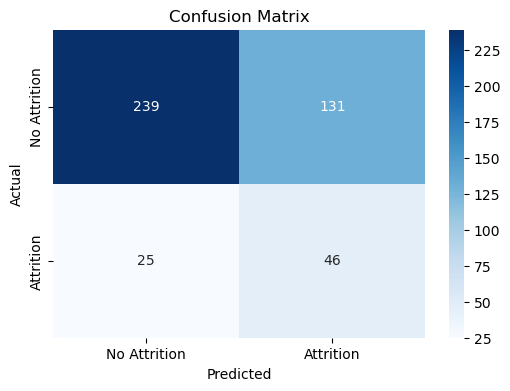

In [89]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

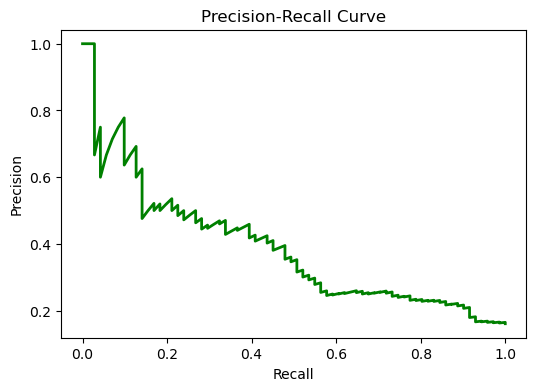

In [90]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='green', lw=2)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

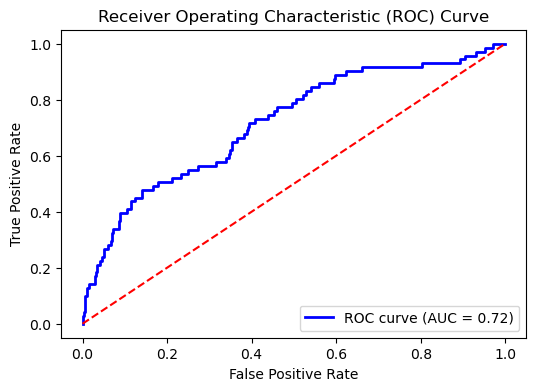

In [91]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

C:\Users\Zana\AppData\Local\Temp\ipykernel_9468\3188019161.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features, y=coefficients, palette='viridis')


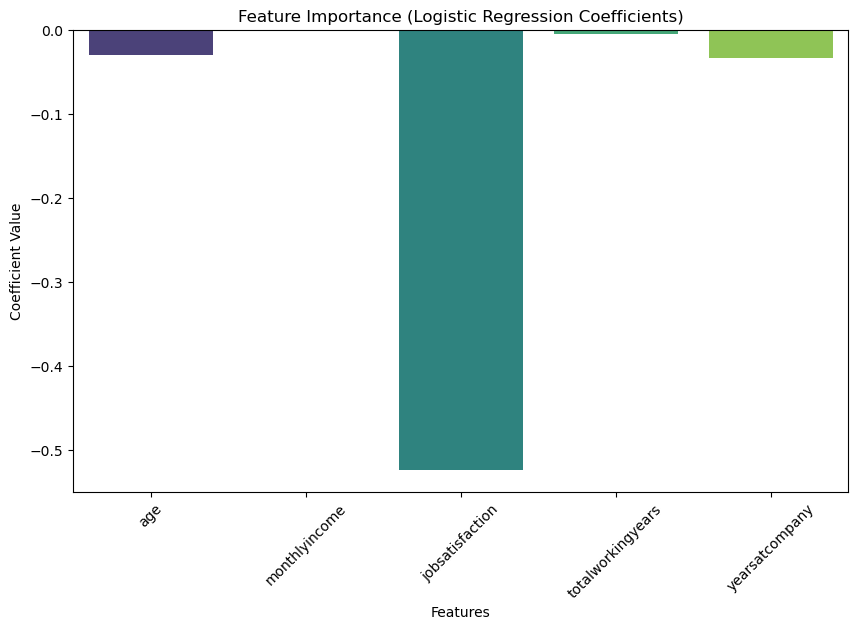

In [92]:
# Get the coefficients of the model
coefficients = model.coef_[0]
features = X.columns

# Create a bar plot of the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=coefficients, palette='viridis')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.show()

In [94]:
from matplotlib.backends.backend_pdf import PdfPages

# Create a PDF to save the visualizations
with PdfPages('logistic_regression_visualizations with smote.pdf') as pdf:
    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    pdf.savefig()  # Save the figure to the PDF
    plt.close()

    # Plot Precision-Recall curve
    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision, color='green', lw=2)
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    pdf.savefig()  # Save the figure to the PDF
    plt.close()

    # Plot ROC curve
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    pdf.savefig()  # Save the figure to the PDF
    plt.close()

    # Plot Feature Importance (Logistic Regression Coefficients)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=features, y=coefficients, palette='viridis')
    plt.title('Feature Importance (Logistic Regression Coefficients)')
    plt.xlabel('Features')
    plt.ylabel('Coefficient Value')
    plt.xticks(rotation=45)
    pdf.savefig()  # Save the figure to the PDF
    plt.close()

C:\Users\Zana\AppData\Local\Temp\ipykernel_9468\809116249.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features, y=coefficients, palette='viridis')


## Random Forest or Decision Tree

In [86]:
from sklearn.ensemble import RandomForestClassifier

# Use Random Forest as an alternative model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

Accuracy: 0.8276643990929705
              precision    recall  f1-score   support

       False       0.85      0.97      0.90       370
        True       0.33      0.07      0.12        71

    accuracy                           0.83       441
   macro avg       0.59      0.52      0.51       441
weighted avg       0.76      0.83      0.78       441



In [97]:
import joblib
joblib.dump(rf_model, 'random_forest_model.pkl')
print("Model saved successfully!")

Model saved successfully!


### Visualization for Random Forest or Decision Tree

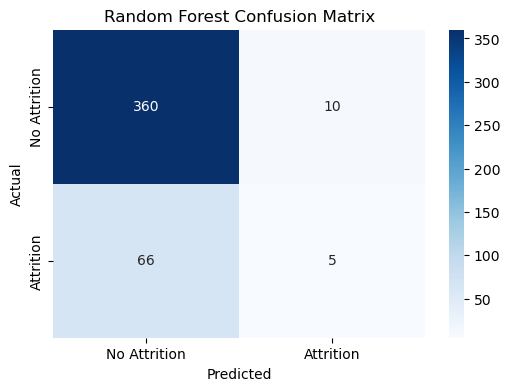

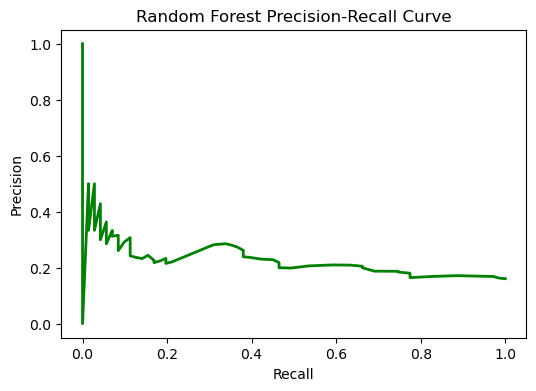

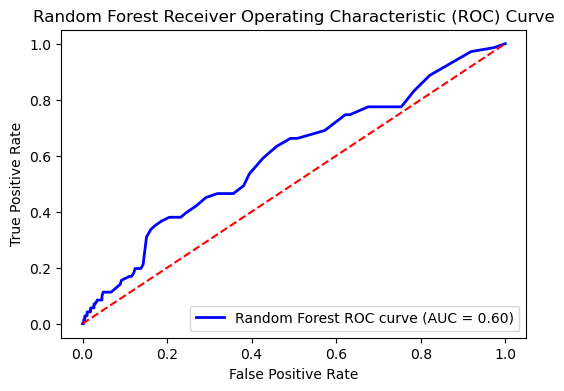

C:\Users\Zana\AppData\Local\Temp\ipykernel_9468\1219291212.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features_rf, y=importances, palette='viridis')


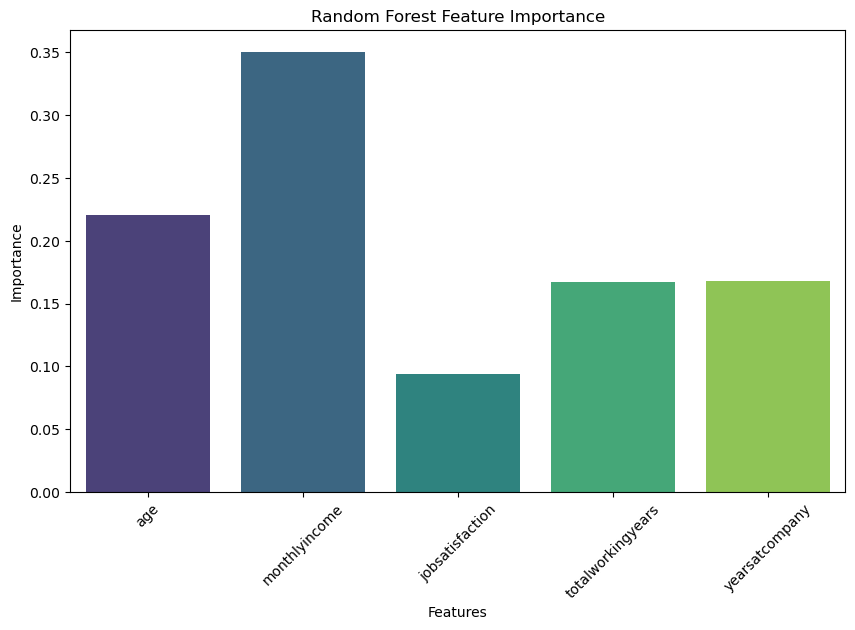

In [98]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm_rf = confusion_matrix(y_test, rf_predictions)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(6, 4))
plt.plot(recall_rf, precision_rf, color='green', lw=2)
plt.title('Random Forest Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# ROC Curve
from sklearn.metrics import roc_curve, auc

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Random Forest Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Feature Importance
features_rf = X.columns
importances = rf_model.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=features_rf, y=importances, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


In [99]:
from matplotlib.backends.backend_pdf import PdfPages

# Create a PDF to save the visualizations
with PdfPages('random_forest_visualizations.pdf') as pdf:
    # Save Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
    plt.title('Random Forest Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    pdf.savefig()
    plt.close()

    # Save Precision-Recall Curve
    plt.figure(figsize=(6, 4))
    plt.plot(recall_rf, precision_rf, color='green', lw=2)
    plt.title('Random Forest Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    pdf.savefig()
    plt.close()

    # Save ROC Curve
    plt.figure(figsize=(6, 4))
    plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest ROC curve (AUC = {roc_auc_rf:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.title('Random Forest Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    pdf.savefig()
    plt.close()

    # Save Feature Importance plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=features_rf, y=importances, palette='viridis')
    plt.title('Random Forest Feature Importance')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation=45)
    pdf.savefig()
    plt.close()


C:\Users\Zana\AppData\Local\Temp\ipykernel_9468\3130975840.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features_rf, y=importances, palette='viridis')


# **Summary of Model Performance and Results**

Here’s a summary of the model performances for **Logistic Regression**, **Logistic Regression with SMOTE**, and **Random Forest** along with their evaluation metrics. Additionally, both the models and visualizations have been saved for future use.

---

### **1. Logistic Regression (Baseline)**  
- **Accuracy**: 0.6213  
- **Classification Report**:
  - **Precision**: 
    - 0.94 for 'False' (No attrition)
    - 0.27 for 'True' (Attrition)
  - **Recall**: 
    - 0.59 for 'False'
    - 0.79 for 'True'
  - **F1-score**:
    - 0.72 for 'False'
    - 0.40 for 'True'

- **Overall Evaluation**:
  - **Accuracy**: 62%
  - **Macro Average**: 
    - 60% precision
    - 69% recall
    - 56% F1-score
  - **Weighted Average**: 
    - 83% precision
    - 62% recall
    - 67% F1-score

This model has a good precision for predicting "No attrition", but struggles with predicting "Attrition" (very low recall and precision for "True").

---

### **2. Logistic Regression with SMOTE (Handling Imbalanced Data)**  
- **Accuracy**: 0.6463  
- **Classification Report**:
  - **Precision**: 
    - 0.91 for 'False' (No attrition)
    - 0.26 for 'True' (Attrition)
  - **Recall**: 
    - 0.65 for 'False'
    - 0.65 for 'True'
  - **F1-score**: 
    - 0.75 for 'False'
    - 0.37 for 'True'

- **Overall Evaluation**:
  - **Accuracy**: 65%
  - **Macro Average**: 
    - 58% precision
    - 65% recall
    - 56% F1-score
  - **Weighted Average**: 
    - 80% precision
    - 65% recall
    - 69% F1-score

SMOTE improved the recall for predicting "Attrition" (True) compared to the baseline model, but it still struggles with predicting "True" attrition with low precision.

---

### **3. Random Forest (Alternative Model)**  
- **Accuracy**: 0.8277  
- **Classification Report**:
  - **Precision**: 
    - 0.85 for 'False' (No attrition)
    - 0.33 for 'True' (Attrition)
  - **Recall**: 
    - 0.97 for 'False'
    - 0.07 for 'True'
  - **F1-score**: 
    - 0.90 for 'False'
    - 0.12 for 'True'

- **Overall Evaluation**:
  - **Accuracy**: 83%
  - **Macro Average**: 
    - 59% precision
    - 52% recall
    - 51% F1-score
  - **Weighted Average**: 
    - 76% precision
    - 83% recall
    - 78% F1-score

The Random Forest model achieved the highest accuracy and precision for predicting "No attrition" but performed poorly with predicting "Attrition", showing high recall for "No attrition" but low recall for "True".

---

### **Model Saving & Visualizations**  
- **Models Saved**: All models were saved after training using **Logistic Regression**, **Logistic Regression with SMOTE**, and **Random Forest**. These models can be loaded and used later for predictions.
- **Visualizations Saved**: The visualizations for model coefficients, performance metrics, and evaluation curves were saved to a **PDF** for easy sharing and documentation.
